## Neuron with 3 inputs

In [1]:
x=[1,2,3]
w=[0.2,0.8,-0.5]
b=2
sum=0
for _x,_w in zip(x,w):
    sum+=_x*_w
print(f"Result of network: {sum+b}")    

Result of network: 2.3


## Layer of Neurons

In [2]:
L=[]
inputs=[1,2,3,2.5]
weights=[[0.2,0.8,-0.5,1],
         [0.5,-0.91,0.26,-0.5],
         [-0.26,-0.27,0.17,0.87]]
B=[2,3,0.5]
for i,_b in enumerate(B):
    wi=weights[i]
    neuron=0
    for _w,_x in zip(wi,inputs):
        neuron+=_w * _x
    neuron += _b
    L.append(neuron)

print(L)



    


[4.8, 1.21, 2.385]


## Importance of Numpy For Neural Network

In [2]:
import numpy as np

A=np.array([1,2,3,4])
B=np.array([2,3,4,5])
## Dot Product
result=np.dot(A,B)
print(result)

40


## Perceptron Calculation Using Dot Product

In [3]:
X=np.array([1.0,2.0,3.0])
W=np.array([0.2,0.8,-0.5])
B=2.0
neuron_output=np.dot(X,W) + B
print(neuron_output)


2.3


## Layer Calculation Using Dot Product

In [4]:
inputs=[1,2,3,2.5]
weights=np.array([[0.2,0.8,-0.5,1],
         [0.5,-0.91,0.26,-0.5],
         [-0.26,-0.27,0.17,0.87]])
biases=[2.0,3.0,0.5]

layer_results=np.dot(weights,np.transpose(inputs)) + np.transpose(biases) 
print(layer_results)

[4.8   1.21  2.385]


In [5]:
inputs=[[1,2,3,2.5],[2.0,5.0,-1.0,2.0],[-1.5,2.7,3.3,-0.8]]
weights=[[0.2,0.8,-0.5,1],
         [0.5,-0.91,0.26,-0.5],
         [-0.26,-0.27,0.17,0.87]]
biases=[2.0,3.0,0.5]

batch_outputs=np.dot(inputs,np.array(weights).T) + np.transpose(biases)
print(batch_outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


## 2 Layers With Batch Data

In [1]:
import numpy as np
inputs=np.array([[1,2,3,2.5],[2.0,5.0,-1.0,2.0],[-1.5,2.7,3.3,-0.8]])
weights=np.array([[0.2,0.8,-0.5,1],
         [0.5,-0.91,0.26,-0.5],
         [-0.26,-0.27,0.17,0.87]])
biases=[2.0,3.0,0.5]
weights2=np.array([[0.1,-0.14,0.5],
          [-0.5,0.12,-0.33],
          [-0.44,0.73,-0.13]])
biases2=[-1,2,-0.5]

layer1_output=np.dot(inputs,np.transpose(weights))+biases
layer2_output=np.dot(layer1_output,np.transpose(weights2)) +biases2

print(f"L1 Result: {layer1_output}")
print("="*25)
print(f"L2 Result: {layer2_output}")



L1 Result: [[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]
L2 Result: [[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


In [2]:

class LayerTemp_Dense():
    def __init__(self,n_inputs,n_neurons):
        self.weights=0.01*np.random.randn(n_inputs,n_neurons)
        self.biases=np.zeros((1,n_neurons))

    def forward(self,inputs):
        output= np.dot(inputs,self.weights) +self.biases
        return output       



## Activation Functions

In [3]:
class ActivationTemp_RELU():
    def forward(self,inputs):
        return np.maximum(0,inputs)
        


In [4]:
class Activation_Softmax():
    def forward(self,inputs):
       exp_values=np.exp(inputs-np.max(inputs,axis=1,keepdims=True))
       return exp_values / np.sum(exp_values,axis=1,keepdims=True)

In [5]:
activation_relu=ActivationTemp_RELU()
output=activation_relu.forward([1,5,3,-6,7,-9])
print(output)



[1 5 3 0 7 0]


In [6]:
activation_softmax=Activation_Softmax()
print(activation_softmax.forward(inputs))


[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]
 [0.00522984 0.34875873 0.63547983 0.0105316 ]]


## Let's Create A Small Neural Network

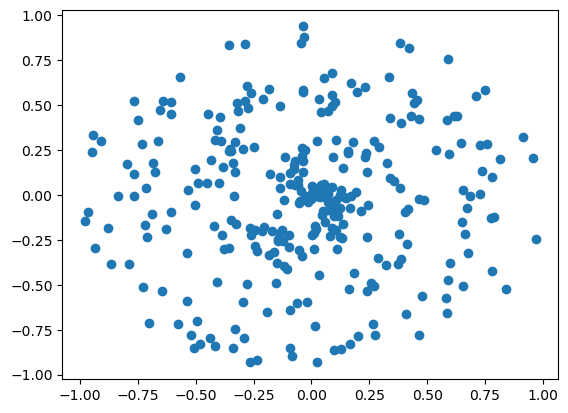

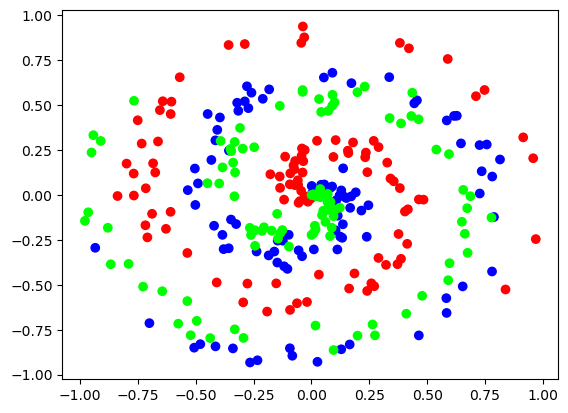

Network Results:[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.3333333  0.33333334]
 [0.3333335  0.333333   0.33333352]
 [0.33333334 0.33333334 0.33333334]]
Result Shape:(300, 3)


In [7]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()
import matplotlib.pyplot as plt
# Non Linear Data Creation
X, y = spiral_data(samples=100, classes=3)
# Data Visualization
plt.scatter(X[:, 0], X[:, 1])
plt.show()
# Data Visualization After Classes
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()


X,y=spiral_data(samples=100,classes=3)


l1=LayerTemp_Dense(2,3)
act1=ActivationTemp_RELU()
l2=LayerTemp_Dense(3,3)
act2=Activation_Softmax()


## Forward Pass Without Loss Func
out_l1=l1.forward(X)
out_act1=act1.forward(out_l1)
out_l2=l2.forward(out_act1)
out_act2=act2.forward(out_l2)

#Network Results For First 5 Samples
print(f"Network Results:{out_act2[:5]}")
print(f"Result Shape:{out_act2.shape}")



In [8]:
class Loss:
    def calculate(self,y_pred,y_true):
        sample_losses=self.forward(y_pred,y_true)
        return np.mean(sample_losses)



In [9]:
class Loss_CategoricalCrossEntropy(Loss):
    def forward(self,y_pred,y_true):
        y_pred_clipped=np.clip(y_pred,1e-7,1-1e-7)
        if len(np.array(y_true).shape) == 1:
            correct_confidences=y_pred_clipped[range(len(y_pred)),y_true]
        elif len(np.array(y_true).shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true,axis=1)
        
        neg_log = -np.log(correct_confidences)
        return neg_log

In [15]:

softmax_outputs=np.array([[0.7,0.1,0.2],[0.1,0.5,0.4],[0.02,0.9,0.08]])
class_targets=[[1,0,0],[0,1,0],[0,1,0]]

loss_cross_entropy=Loss_CategoricalCrossEntropy()
avg_loss=loss_cross_entropy.calculate(softmax_outputs,class_targets)
print(avg_loss)

0.38506088005216804


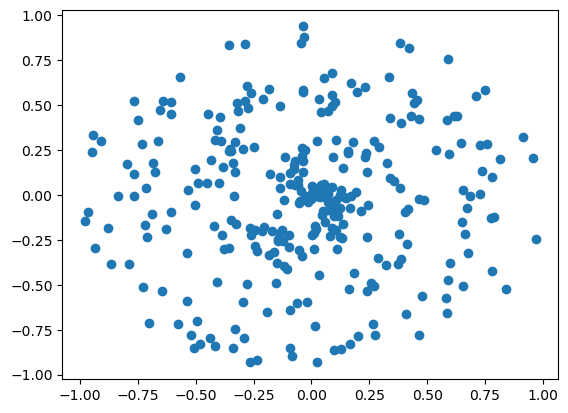

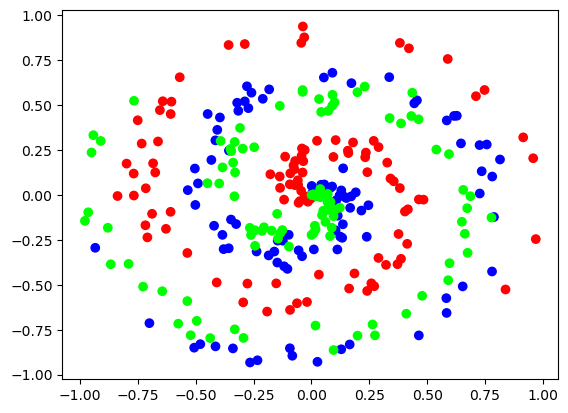

Network Results:[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.3333333  0.33333334]
 [0.3333335  0.333333   0.33333352]
 [0.33333334 0.33333334 0.33333334]]
Result Shape:(300, 3)
Loss: 1.10


In [10]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()
import matplotlib.pyplot as plt
# Non Linear Data Creation
X, y = spiral_data(samples=100, classes=3)
# Data Visualization
plt.scatter(X[:, 0], X[:, 1])
plt.show()
# Data Visualization After Classes
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()


X,y=spiral_data(samples=100,classes=3)


l1=LayerTemp_Dense(2,3)
act1=ActivationTemp_RELU()
l2=LayerTemp_Dense(3,3)
act2=Activation_Softmax()
loss_func=Loss_CategoricalCrossEntropy()


## Forward Pass Without Loss Func
out_l1=l1.forward(X)
out_act1=act1.forward(out_l1)
out_l2=l2.forward(out_act1)
out_act2=act2.forward(out_l2)
avg_loss=loss_func.calculate(out_act2,y)

#Network Results For First 5 Samples
print(f"Network Results:{out_act2[:5]}")
print(f"Result Shape:{out_act2.shape}")
print(f"Loss: {avg_loss:.2f}")



In [17]:
y.shape

(300,)

In [18]:
out_act2.shape

(300, 3)

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

## Calculate Backpropagation For Single Neuron

In [20]:
weights=np.array([-3.0,-1.0,2.0])
bias=1.0
inputs=np.array([1.0,-2.0,3.0])
target_output=0.0
learning_rate=0.001
def relu(x):
    return np.maximum(0,x)
def relu_derivative(x):
    return np.where(x>0,1.0,0.0)

for iteration in range(200):
    ## Forward Pass
    linear_output= np.dot(weights,inputs) + bias
    output= relu(linear_output)
    loss = (output-target_output) ** 2

    ## Backward Pass
    dloss_doutput = 2 * (output-target_output)
    doutput_dlinear = relu_derivative(linear_output)
    dlinear_dweights=inputs
    dlinear_dbias=1.0

    dloss_dlinear = dloss_doutput *doutput_dlinear
    dloss_dweights = dloss_dlinear * dlinear_dweights
    dloss_dbias = dloss_dlinear * dlinear_dbias

    # Update Weights
    weights -= learning_rate * dloss_dweights
    bias -= learning_rate * dloss_dbias
    # Print Loss For Iteration
    print(f"{iteration+1}.iteration -> Loss:{loss} ")
print(f"Final Weights:{weights}")
print(f"Final Bias:{bias}")

1.iteration -> Loss:36.0 
2.iteration -> Loss:33.872397424621624 
3.iteration -> Loss:31.87054345809546 
4.iteration -> Loss:29.98699091998773 
5.iteration -> Loss:28.214761511794592 
6.iteration -> Loss:26.54726775906168 
7.iteration -> Loss:24.978326552541866 
8.iteration -> Loss:23.5021050739742 
9.iteration -> Loss:22.11313179151597 
10.iteration -> Loss:20.806246424284897 
11.iteration -> Loss:19.576596334671486 
12.iteration -> Loss:18.41961908608719 
13.iteration -> Loss:17.33101994032309 
14.iteration -> Loss:16.306757070164853 
15.iteration -> Loss:15.343027506224132 
16.iteration -> Loss:14.436253786815284 
17.iteration -> Loss:13.583071280700132 
18.iteration -> Loss:12.780312744165439 
19.iteration -> Loss:12.024995767388878 
20.iteration -> Loss:11.314319082257104 
21.iteration -> Loss:10.64564263994962 
22.iteration -> Loss:10.016485041642266 
23.iteration -> Loss:9.424510031713222 
24.iteration -> Loss:8.867521365009814 
25.iteration -> Loss:8.34345204094211 
26.iteratio

## Backpropagation For Layer

In [21]:
inputs=np.array([1.0,2.0,3.0,4.0])
weights=np.array([[0.1,0.2,0.3,0.4],
                 [0.5,0.6,0.7,0.8],
                 [0.9,1.0,1.1,1.2]])

biases=np.array([0.1,0.2,0.3])
learning_rate=0.001

def relu(x):
    return np.maximum(0,x)
def relu_derivative(x):
    return np.where(x>0,1.0,0.0)

for iteration in range(200):
    ##Forward Pass
    z = np.dot(weights,inputs) + biases
    a= relu(z)
    y=np.sum(a)
    #Loss
    loss = y**2
    ##Backward Pass
    dl_dy=2*y
    dy_da = np.ones_like(a)
    da_dz=relu_derivative(z)
    dl_da=dl_dy * dy_da
    dl_dz=dl_da * da_dz
    dl_dW=np.outer(dl_dz,inputs)
    dl_db=dl_dz

    ## Update Weights
    weights -= learning_rate * dl_dW
    biases -= learning_rate*dl_db

    if iteration % 20 == 0 :
        print(f"{iteration}.Loss:{loss}")

print(f"Final Weights:{weights}\nFinal Biases:{biases}")


0.Loss:466.56000000000006
20.Loss:5.329595763793193
40.Loss:0.41191524253483786
60.Loss:0.03183621475376345
80.Loss:0.002460565405431671
100.Loss:0.0001901729121621426
120.Loss:1.4698120139337557e-05
140.Loss:1.1359948840900371e-06
160.Loss:8.779778427447647e-08
180.Loss:6.785903626216421e-09
Final Weights:[[-0.00698895 -0.0139779  -0.02096685 -0.0279558 ]
 [ 0.25975286  0.11950571 -0.02074143 -0.16098857]
 [ 0.53548461  0.27096922  0.00645383 -0.25806156]]
Final Biases:[-0.00698895 -0.04024714 -0.06451539]


## Backpropagation For Block of Layer

In [22]:
import numpy as np
dvalues=np.array([[1.,1.,1.],
                  [2.,2.,2.],
                  [3.,3.,3.]])
inputs=np.array([[1,2,3,2.5],
                 [2.,5.,-1.,2.],
                 [-1.5,2.7,3.3,-0.8]])
biases=np.array([[2,3,0.5]])
weights=np.array([[0.2,0.8,-0.5,1],
         [0.5,-0.91,0.26,-0.5],
         [-0.26,-0.27,0.17,0.87]]).T
dweights=np.dot(inputs.T,dvalues)
dbiases=np.sum(dvalues,axis=0,keepdims=True)
dinputs=np.dot(dvalues,weights.T)
print(dweights)
print("="*20)
print(dbiases)
print("="*20)
print(dinputs)


[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]
[[6. 6. 6.]]
[[ 0.44 -0.38 -0.07  1.37]
 [ 0.88 -0.76 -0.14  2.74]
 [ 1.32 -1.14 -0.21  4.11]]


## Adding Backward Methods To Layers

In [13]:

class Layer_Dense():
    def __init__(self,n_inputs,n_neurons):
        ## Randomized Weights and Biases
        self.weights=0.01*np.random.randn(n_inputs,n_neurons)
        self.biases=np.zeros((1,n_neurons))

    def forward(self,inputs):
        self.inputs = inputs
        self.output= np.dot(inputs,self.weights) +self.biases
    def backward(self,dvalues):
        self.dweights = np.dot(self.inputs.T,dvalues)
        self.dbiases=np.sum(dvalues,axis=0,keepdims=True)
        self.dinputs=np.dot(dvalues,self.weights.T)




In [14]:
class Activation_RELU():
    def forward(self,inputs):
        self.inputs=inputs
        self.output = np.maximum(0,inputs)
    def backward(self,dvalues):
        self.dinputs=dvalues.copy()
        self.dinputs[self.inputs<=0] = 0
        
    

In [15]:
class Activation_Loss_Cross_Entropy:
    def __init__(self):
        self.activation =Activation_Softmax()
        self.loss=Loss_CategoricalCrossEntropy()
    def forward(self,inputs,y_true):
        self.output=self.activation.forward(inputs)
        return self.loss.calculate(self.output,y_true)
    
    def backward(self,dvalues,y_true):
        samples=len(dvalues)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true,axis=1)
        self.dinputs=dvalues.copy()
        self.dinputs[range(samples),y_true] -= 1
        self.dinputs /= samples
         



## Let's Code Small Neural Network With Backpropagation

In [26]:
X, y = spiral_data(samples=100, classes=3)
dense1=Layer_Dense(2,3)
act1=Activation_RELU()
dense2=Layer_Dense(3,3)
loss_activation_cross = Activation_Loss_Cross_Entropy()

##Forward Pass
dense1.forward(X)
act1.forward(dense1.output)
dense2.forward(act1.output)
loss = loss_activation_cross.forward(dense2.output,y)

print(loss_activation_cross.output[:5])
print(f"Loss:{loss}")
predictions=np.argmax(loss_activation_cross.output,axis=1)
if len(y.shape) == 2:
    y=np.argmax(y,axis=1) 
accuracy=np.mean(predictions == y)

print(f"Accuracy:{accuracy}")

##Backward Pass
loss_activation_cross.backward(loss_activation_cross.output,y)
dense2.backward(loss_activation_cross.dinputs)
act1.backward(dense2.dinputs)
dense1.backward(act1.dinputs)

print("***Dense 1***")
print(dense1.dweights)
print(dense1.dbiases)
print("***Dense 2***")
print(dense2.dweights)
print(dense2.dbiases)




[[0.33333334 0.33333334 0.33333334]
 [0.33333337 0.33333337 0.3333332 ]
 [0.3333335  0.33333352 0.333333  ]
 [0.3333337  0.33333373 0.3333326 ]
 [0.33333334 0.33333334 0.33333334]]
Loss:1.0986114740371704
Accuracy:0.36333333333333334
***Dense 1***
[[-3.2504966e-05  2.7845432e-05  9.6632823e-05]
 [-1.3178818e-04 -4.9405417e-04  4.7507641e-05]]
[[-0.00015409  0.00053393 -0.00020046]]
***Dense 2***
[[-3.57565987e-05 -3.54187723e-05  7.11753601e-05]
 [-1.20259765e-05  2.97411952e-05 -1.77152215e-05]
 [-1.13478804e-04  2.56245432e-04 -1.42766643e-04]]
[[-5.0753588e-06  2.3465836e-06  2.3851171e-06]]


## Let's code optimizers

In [27]:
class Optimizer_SGD():
    def __init__(self,learning_rate=1.0):
      self.learning_rate=learning_rate
    
    def update_params(self,layer):
      layer.weights -= self.learning_rate * layer.dweights
      layer.biases -= self.learning_rate * layer.dbiases
      

In [52]:
X, y = spiral_data(samples=100, classes=3)
dense1=Layer_Dense(2,64)
act1=Activation_RELU()
dense2=Layer_Dense(64,3)
loss_activation_cross = Activation_Loss_Cross_Entropy()
optimizer = Optimizer_SGD()


for epoch in range(10001):
    ##Forward Pass
    dense1.forward(X)
    act1.forward(dense1.output)
    dense2.forward(act1.output)
    loss = loss_activation_cross.forward(dense2.output,y)

    predictions=np.argmax(loss_activation_cross.output,axis=1)
    if len(y.shape) == 2:
        y=np.argmax(y,axis=1) 
    accuracy=np.mean(predictions == y)
    if epoch % 100 == 0: 
        print(f"Epoch:{epoch}, Accuracy:{accuracy:.3f}, Loss:{loss:.3f}")

    ##Backward Pass
    loss_activation_cross.backward(loss_activation_cross.output,y)
    dense2.backward(loss_activation_cross.dinputs)
    act1.backward(dense2.dinputs)
    dense1.backward(act1.dinputs)

    #Update Params
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)





Epoch:0, Accuracy:0.270, Loss:1.099
Epoch:100, Accuracy:0.413, Loss:1.081
Epoch:200, Accuracy:0.433, Loss:1.070
Epoch:300, Accuracy:0.407, Loss:1.066
Epoch:400, Accuracy:0.430, Loss:1.065
Epoch:500, Accuracy:0.413, Loss:1.064
Epoch:600, Accuracy:0.420, Loss:1.063
Epoch:700, Accuracy:0.433, Loss:1.059
Epoch:800, Accuracy:0.440, Loss:1.053
Epoch:900, Accuracy:0.450, Loss:1.043
Epoch:1000, Accuracy:0.430, Loss:1.045
Epoch:1100, Accuracy:0.457, Loss:1.036
Epoch:1200, Accuracy:0.473, Loss:1.029
Epoch:1300, Accuracy:0.530, Loss:1.028
Epoch:1400, Accuracy:0.453, Loss:1.059
Epoch:1500, Accuracy:0.423, Loss:1.038
Epoch:1600, Accuracy:0.533, Loss:1.003
Epoch:1700, Accuracy:0.480, Loss:1.010
Epoch:1800, Accuracy:0.463, Loss:0.977
Epoch:1900, Accuracy:0.423, Loss:0.991
Epoch:2000, Accuracy:0.467, Loss:0.952
Epoch:2100, Accuracy:0.443, Loss:0.982
Epoch:2200, Accuracy:0.507, Loss:0.938
Epoch:2300, Accuracy:0.507, Loss:0.936
Epoch:2400, Accuracy:0.490, Loss:0.927
Epoch:2500, Accuracy:0.527, Loss:0.95

## Optimizer With Decay Parameter
### Learning Rate Optimization

In [54]:
class Optimizer_Decay_SGD():
    def __init__(self,learning_rate=1.0,decay=0.0):
      self.learning_rate=learning_rate
      self.current_lr=self.learning_rate
      self.decay= decay
      self.iterations=0

    def update_params(self,layer):
      if self.decay:
          self.current_lr = self.learning_rate / (1.0+self.decay*self.iterations)
      layer.weights -= self.current_lr * layer.dweights
      layer.biases -=  self.current_lr * layer.dbiases
    def post_update_params(self):
       self.iterations += 1
       
       

Epoch:0, Accuracy:0.333, Loss:1.099
Epoch:100, Accuracy:0.433, Loss:1.085
Epoch:200, Accuracy:0.413, Loss:1.070
Epoch:300, Accuracy:0.430, Loss:1.069
Epoch:400, Accuracy:0.417, Loss:1.069
Epoch:500, Accuracy:0.427, Loss:1.068
Epoch:600, Accuracy:0.437, Loss:1.067
Epoch:700, Accuracy:0.440, Loss:1.064
Epoch:800, Accuracy:0.453, Loss:1.058
Epoch:900, Accuracy:0.453, Loss:1.047
Epoch:1000, Accuracy:0.473, Loss:1.030
Epoch:1100, Accuracy:0.433, Loss:1.017
Epoch:1200, Accuracy:0.413, Loss:1.009
Epoch:1300, Accuracy:0.437, Loss:1.001
Epoch:1400, Accuracy:0.443, Loss:0.993
Epoch:1500, Accuracy:0.453, Loss:0.983
Epoch:1600, Accuracy:0.457, Loss:0.976
Epoch:1700, Accuracy:0.450, Loss:0.972
Epoch:1800, Accuracy:0.473, Loss:0.969
Epoch:1900, Accuracy:0.500, Loss:0.979
Epoch:2000, Accuracy:0.503, Loss:0.940
Epoch:2100, Accuracy:0.500, Loss:0.944
Epoch:2200, Accuracy:0.510, Loss:0.913
Epoch:2300, Accuracy:0.570, Loss:0.886
Epoch:2400, Accuracy:0.570, Loss:0.913
Epoch:2500, Accuracy:0.580, Loss:0.86

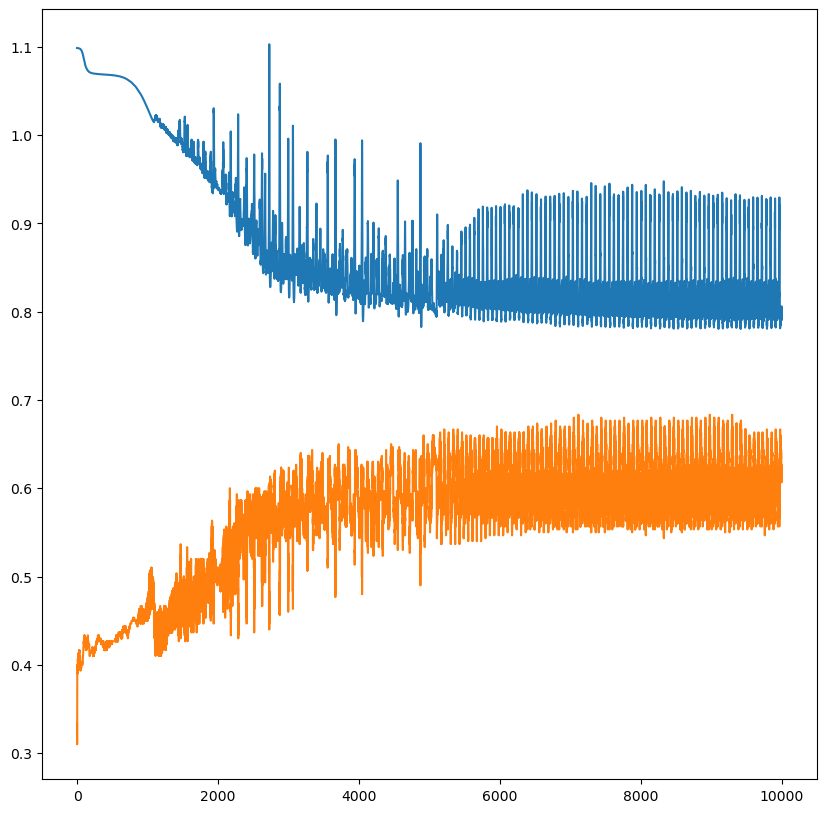

In [67]:
X, y = spiral_data(samples=100, classes=3)
dense1=Layer_Dense(2,64)
act1=Activation_RELU()
dense2=Layer_Dense(64,3)
loss_activation_cross = Activation_Loss_Cross_Entropy()
decay_optimizer = Optimizer_Decay_SGD(decay=1e-3)

all_losses=[]
all_accuracy=[]
epochs=10001

for epoch in range(epochs):
    ##Forward Pass
    dense1.forward(X)
    act1.forward(dense1.output)
    dense2.forward(act1.output)
    loss = loss_activation_cross.forward(dense2.output,y)

    predictions=np.argmax(loss_activation_cross.output,axis=1)
    if len(y.shape) == 2:
        y=np.argmax(y,axis=1) 
    accuracy=np.mean(predictions == y)
    all_accuracy.append(accuracy)
    all_losses.append(loss)
    if epoch % 100 == 0: 
        print(f"Epoch:{epoch}, Accuracy:{accuracy:.3f}, Loss:{loss:.3f}")

    ##Backward Pass
    loss_activation_cross.backward(loss_activation_cross.output,y)
    dense2.backward(loss_activation_cross.dinputs)
    act1.backward(dense2.dinputs)
    dense1.backward(act1.dinputs)

    #Update Params
    decay_optimizer.update_params(dense1)
    decay_optimizer.update_params(dense2)
    decay_optimizer.post_update_params()

##Plot Loss and Accuracy
plt.figure(figsize=(10,10))   
plt.plot(range(epochs),all_losses)
plt.plot(range(epochs),all_accuracy)
plt.show()






## Optimizer Optimization With Momentum and Decay

In [70]:
class Optimizer_Decay_Momentum_SGD():
    def __init__(self,learning_rate=1.0,decay=0.0,momentum=0.0):
      self.learning_rate=learning_rate
      self.momentum= momentum
      self.current_lr=self.learning_rate
      self.decay= decay
      self.iterations=0

    def update_params(self,layer):
        if self.decay:
            self.current_lr = self.learning_rate / (1.0+self.decay*self.iterations)

        weights_updates= -self.current_lr * layer.dweights
        biases_updates = -self.current_lr * layer.dbiases
        
        if self.momentum:
            if not hasattr(layer,"weight_momentums"):
                layer.weight_momentums=np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)

            weights_updates += self.momentum * layer.weight_momentums 
            biases_updates += self.momentum * layer.bias_momentums
            layer.weight_momentums=weights_updates
            layer.bias_momentums = biases_updates
       
        layer.weights += weights_updates 
        layer.biases +=  biases_updates
    
    def post_update_params(self):
       self.iterations += 1
       
       

Epoch:0, Accuracy:0.347, Loss:1.099
Epoch:100, Accuracy:0.453, Loss:1.062
Epoch:200, Accuracy:0.447, Loss:1.060
Epoch:300, Accuracy:0.453, Loss:1.057
Epoch:400, Accuracy:0.450, Loss:1.053
Epoch:500, Accuracy:0.453, Loss:1.045
Epoch:600, Accuracy:0.453, Loss:1.032
Epoch:700, Accuracy:0.467, Loss:1.012
Epoch:800, Accuracy:0.417, Loss:1.015
Epoch:900, Accuracy:0.437, Loss:1.000
Epoch:1000, Accuracy:0.463, Loss:0.981
Epoch:1100, Accuracy:0.450, Loss:0.966
Epoch:1200, Accuracy:0.457, Loss:0.944
Epoch:1300, Accuracy:0.463, Loss:0.929
Epoch:1400, Accuracy:0.457, Loss:0.925
Epoch:1500, Accuracy:0.470, Loss:0.914
Epoch:1600, Accuracy:0.480, Loss:0.914
Epoch:1700, Accuracy:0.477, Loss:0.908
Epoch:1800, Accuracy:0.487, Loss:0.899
Epoch:1900, Accuracy:0.497, Loss:0.896
Epoch:2000, Accuracy:0.503, Loss:0.886
Epoch:2100, Accuracy:0.517, Loss:0.886
Epoch:2200, Accuracy:0.520, Loss:0.879
Epoch:2300, Accuracy:0.573, Loss:0.863
Epoch:2400, Accuracy:0.593, Loss:0.877
Epoch:2500, Accuracy:0.523, Loss:0.85

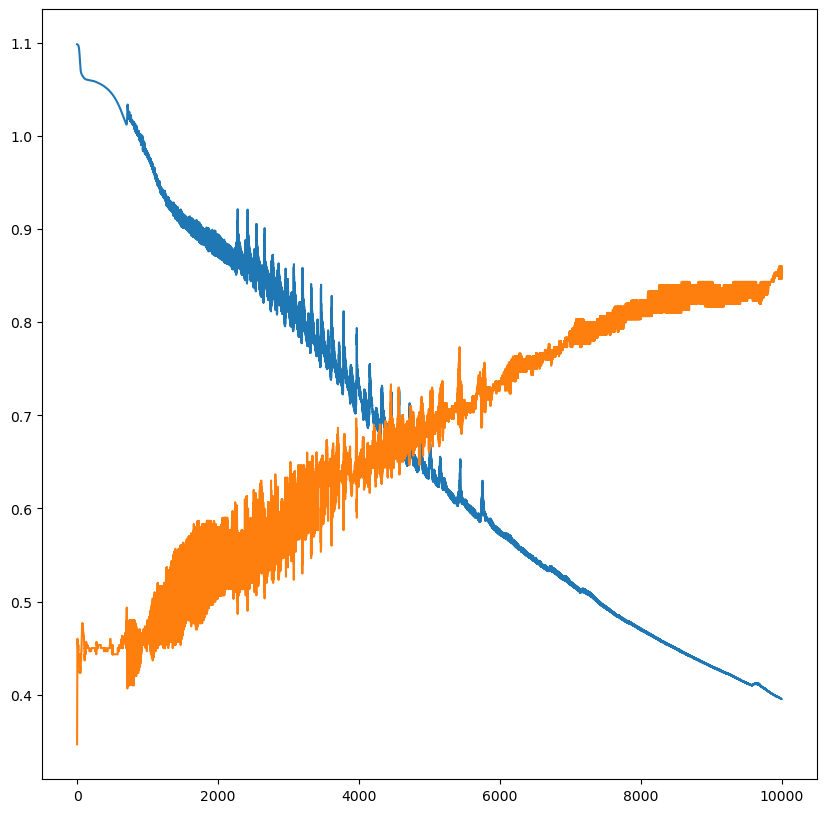

In [75]:
X, y = spiral_data(samples=100, classes=3)
dense1=Layer_Dense(2,64)
act1=Activation_RELU()
dense2=Layer_Dense(64,3)
loss_activation_cross = Activation_Loss_Cross_Entropy()
decay_optimizer = Optimizer_Decay_Momentum_SGD(decay=1e-3,momentum=0.5)

all_losses=[]
all_accuracy=[]
epochs=10001

for epoch in range(epochs):
    ##Forward Pass
    dense1.forward(X)
    act1.forward(dense1.output)
    dense2.forward(act1.output)
    loss = loss_activation_cross.forward(dense2.output,y)

    predictions=np.argmax(loss_activation_cross.output,axis=1)
    if len(y.shape) == 2:
        y=np.argmax(y,axis=1) 
    accuracy=np.mean(predictions == y)
    all_accuracy.append(accuracy)
    all_losses.append(loss)
    if epoch % 100 == 0: 
        print(f"Epoch:{epoch}, Accuracy:{accuracy:.3f}, Loss:{loss:.3f}")

    ##Backward Pass
    loss_activation_cross.backward(loss_activation_cross.output,y)
    dense2.backward(loss_activation_cross.dinputs)
    act1.backward(dense2.dinputs)
    dense1.backward(act1.dinputs)

    #Update Params
    decay_optimizer.update_params(dense1)
    decay_optimizer.update_params(dense2)
    decay_optimizer.post_update_params()

##Plot Loss and Accuracy
plt.figure(figsize=(10,10))   
plt.plot(range(epochs),all_losses)
plt.plot(range(epochs),all_accuracy)
plt.show()






## AdaGrad Optimizer

In [76]:
class Optimizer_Adagrad():
    def __init__(self,learning_rate=1.0,decay=0.0,epsilon=1e-7):
      self.learning_rate=learning_rate
      self.current_lr=self.learning_rate
      self.decay= decay
      self.epsilon=epsilon
      self.iterations=0

    def update_params(self,layer):
        if self.decay:
            self.current_lr = self.learning_rate / (1.0+self.decay*self.iterations)
        
        if not hasattr(layer,"weight_cache"):
            layer.weight_cache=np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
        layer.weight_cache+=layer.dweights**2
        layer.bias_cache+=layer.dbiases**2

        layer.weights+= -self.current_lr * layer.dweights /(np.sqrt(layer.weight_cache + self.epsilon))
        layer.biases += -self.current_lr * layer.dbiases  /(np.sqrt(layer.bias_cache + self.epsilon))
            
    
    def post_update_params(self):
       self.iterations += 1
       
       

Epoch:0, Accuracy:0.430, Loss:1.099
Epoch:100, Accuracy:0.433, Loss:1.039
Epoch:200, Accuracy:0.420, Loss:1.009
Epoch:300, Accuracy:0.437, Loss:0.983
Epoch:400, Accuracy:0.433, Loss:0.965
Epoch:500, Accuracy:0.450, Loss:0.953
Epoch:600, Accuracy:0.467, Loss:0.941
Epoch:700, Accuracy:0.473, Loss:0.944
Epoch:800, Accuracy:0.500, Loss:0.915
Epoch:900, Accuracy:0.537, Loss:0.897
Epoch:1000, Accuracy:0.547, Loss:0.881
Epoch:1100, Accuracy:0.560, Loss:0.869
Epoch:1200, Accuracy:0.587, Loss:0.862
Epoch:1300, Accuracy:0.570, Loss:0.858
Epoch:1400, Accuracy:0.580, Loss:0.829
Epoch:1500, Accuracy:0.590, Loss:0.829
Epoch:1600, Accuracy:0.610, Loss:0.819
Epoch:1700, Accuracy:0.590, Loss:0.801
Epoch:1800, Accuracy:0.610, Loss:0.795
Epoch:1900, Accuracy:0.610, Loss:0.780
Epoch:2000, Accuracy:0.630, Loss:0.764
Epoch:2100, Accuracy:0.643, Loss:0.761
Epoch:2200, Accuracy:0.657, Loss:0.755
Epoch:2300, Accuracy:0.657, Loss:0.717
Epoch:2400, Accuracy:0.663, Loss:0.725
Epoch:2500, Accuracy:0.697, Loss:0.71

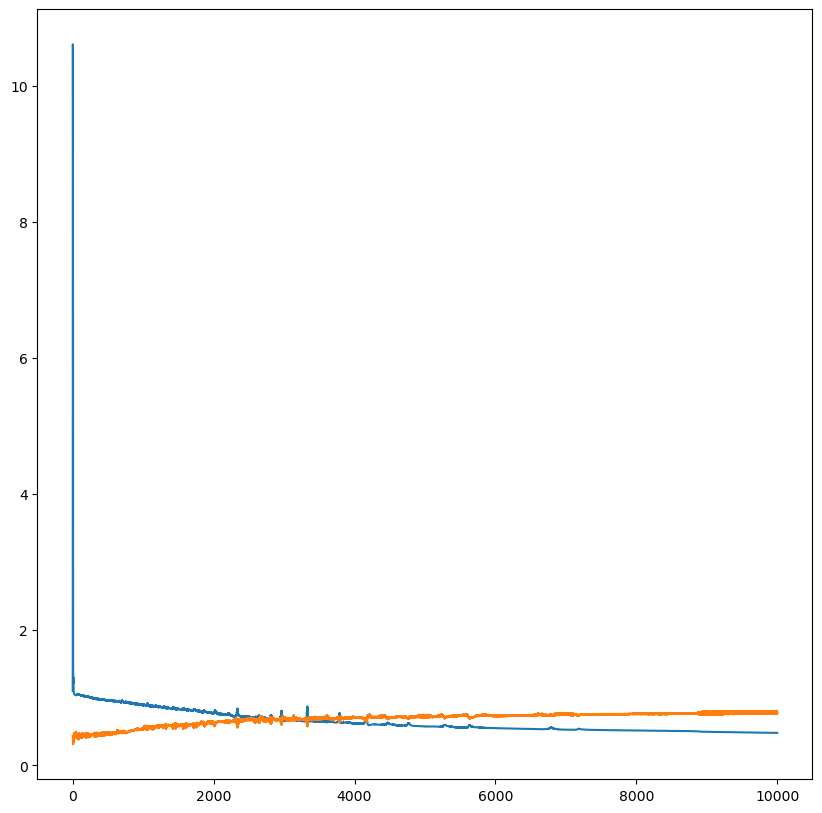

In [84]:
X, y = spiral_data(samples=100, classes=3)
dense1=Layer_Dense(2,64)
act1=Activation_RELU()
dense2=Layer_Dense(64,3)
loss_activation_cross = Activation_Loss_Cross_Entropy()
adagrad_optimizer = Optimizer_Adagrad(decay=1e-5)

all_losses=[]
all_accuracy=[]
epochs=10001

for epoch in range(epochs):
    ##Forward Pass
    dense1.forward(X)
    act1.forward(dense1.output)
    dense2.forward(act1.output)
    loss = loss_activation_cross.forward(dense2.output,y)

    predictions=np.argmax(loss_activation_cross.output,axis=1)
    if len(y.shape) == 2:
        y=np.argmax(y,axis=1) 
    accuracy=np.mean(predictions == y)
    all_accuracy.append(accuracy)
    all_losses.append(loss)
    if epoch % 100 == 0: 
        print(f"Epoch:{epoch}, Accuracy:{accuracy:.3f}, Loss:{loss:.3f}")

    ##Backward Pass
    loss_activation_cross.backward(loss_activation_cross.output,y)
    dense2.backward(loss_activation_cross.dinputs)
    act1.backward(dense2.dinputs)
    dense1.backward(act1.dinputs)

    #Update Params
    adagrad_optimizer.update_params(dense1)
    adagrad_optimizer.update_params(dense2)
    adagrad_optimizer.post_update_params()

##Plot Loss and Accuracy
plt.figure(figsize=(10,10))   
plt.plot(range(epochs),all_losses)
plt.plot(range(epochs),all_accuracy)
plt.show()






## RMSProp Optimizer

In [24]:
class Optimizer_RMSProp():
    def __init__(self,learning_rate=1.0,decay=0.0,epsilon=1e-7,rho=0.9):
      self.learning_rate=learning_rate
      self.current_lr=self.learning_rate
      self.decay= decay
      self.epsilon=epsilon
      self.iterations=0
      self.rho = rho

    def update_params(self,layer):
        if self.decay:
            self.current_lr = self.learning_rate / (1.0+self.decay*self.iterations)
        
        if not hasattr(layer,"weight_cache"):
            layer.weight_cache=np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
        layer.weight_cache = self.rho*layer.weight_cache + (1-self.rho)*layer.dweights**2
        layer.bias_cache = self.rho*layer.bias_cache + (1-self.rho)*layer.dbiases**2

        layer.weights+= -self.current_lr * layer.dweights /(np.sqrt(layer.weight_cache + self.epsilon))
        layer.biases += -self.current_lr * layer.dbiases  /(np.sqrt(layer.bias_cache + self.epsilon))
            
    
    def post_update_params(self):
       self.iterations += 1
       
       

Epoch:0, Accuracy:0.323, Loss:1.099
Epoch:100, Accuracy:0.420, Loss:1.040
Epoch:200, Accuracy:0.430, Loss:1.029
Epoch:300, Accuracy:0.433, Loss:1.024
Epoch:400, Accuracy:0.427, Loss:1.019
Epoch:500, Accuracy:0.450, Loss:1.008
Epoch:600, Accuracy:0.453, Loss:0.993
Epoch:700, Accuracy:0.450, Loss:0.985
Epoch:800, Accuracy:0.437, Loss:0.981
Epoch:900, Accuracy:0.460, Loss:0.975
Epoch:1000, Accuracy:0.467, Loss:0.973
Epoch:1100, Accuracy:0.470, Loss:0.972
Epoch:1200, Accuracy:0.470, Loss:0.972
Epoch:1300, Accuracy:0.470, Loss:0.971
Epoch:1400, Accuracy:0.470, Loss:0.970
Epoch:1500, Accuracy:0.467, Loss:0.970
Epoch:1600, Accuracy:0.467, Loss:0.970
Epoch:1700, Accuracy:0.467, Loss:0.969
Epoch:1800, Accuracy:0.467, Loss:0.969
Epoch:1900, Accuracy:0.467, Loss:0.969
Epoch:2000, Accuracy:0.470, Loss:0.969
Epoch:2100, Accuracy:0.467, Loss:0.968
Epoch:2200, Accuracy:0.467, Loss:0.968
Epoch:2300, Accuracy:0.467, Loss:0.968
Epoch:2400, Accuracy:0.467, Loss:0.968
Epoch:2500, Accuracy:0.467, Loss:0.96

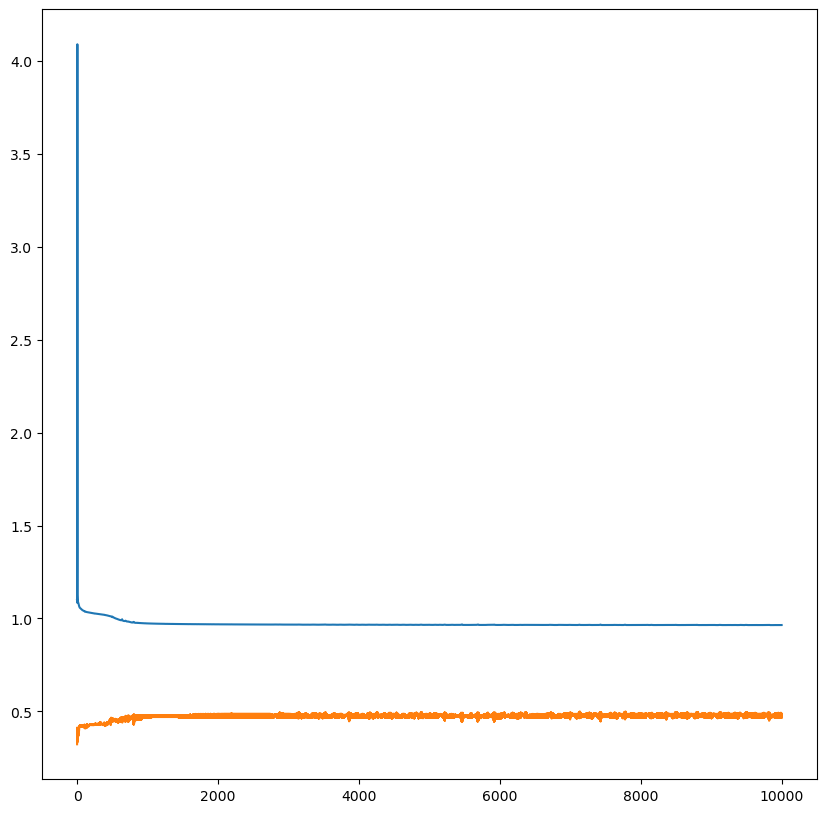

In [26]:
X, y = spiral_data(samples=100, classes=3)
dense1=Layer_Dense(2,64)
act1=Activation_RELU()
dense2=Layer_Dense(64,3)
loss_activation_cross = Activation_Loss_Cross_Entropy()
rms_optimizer = Optimizer_RMSProp(learning_rate=0.02,decay=1e-5,rho=0.999)

all_losses=[]
all_accuracy=[]
epochs=10001

for epoch in range(epochs):
    ##Forward Pass
    dense1.forward(X)
    act1.forward(dense1.output)
    dense2.forward(act1.output)
    loss = loss_activation_cross.forward(dense2.output,y)

    predictions=np.argmax(loss_activation_cross.output,axis=1)
    if len(y.shape) == 2:
        y=np.argmax(y,axis=1) 
    accuracy=np.mean(predictions == y)
    all_accuracy.append(accuracy)
    all_losses.append(loss)
    if epoch % 100 == 0: 
        print(f"Epoch:{epoch}, Accuracy:{accuracy:.3f}, Loss:{loss:.3f}")

    ##Backward Pass
    loss_activation_cross.backward(loss_activation_cross.output,y)
    dense2.backward(loss_activation_cross.dinputs)
    act1.backward(dense2.dinputs)
    dense1.backward(act1.dinputs)

    #Update Params
    rms_optimizer.update_params(dense1)
    rms_optimizer.update_params(dense2)
    rms_optimizer.post_update_params()

##Plot Loss and Accuracy
plt.figure(figsize=(10,10))   
plt.plot(range(epochs),all_losses)
plt.plot(range(epochs),all_accuracy)
plt.show()






## Adam Optimizer 

In [16]:
class Optimizer_Adam():
    def __init__(self,learning_rate=0.001,decay=0.0,epsilon=1e-7,beta1=0.99,beta2=0.999):
      self.learning_rate=learning_rate
      self.current_lr=self.learning_rate
      self.decay= decay
      self.epsilon=epsilon
      self.iterations=0
      self.beta1 = beta1
      self.beta2 = beta2

    def update_params(self,layer):
        if self.decay:
            self.current_lr = self.learning_rate / (1.0+self.decay*self.iterations)
        
        if not hasattr(layer,"weight_momentums"):
            layer.weight_momentums=np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.weight_cache = np.zeros_like(layer.dweights)
            layer.bias_cache = np.zeros_like(layer.biases)
        #Update Momentum
        layer.weight_momentums = self.beta1 * layer.weight_momentums + (1-self.beta1) *layer.dweights
        layer.bias_momentums = self.beta1 * layer.bias_momentums + (1-self.beta1) *layer.dbiases
        #Momentum Regularization
        weight_momentums_regulated = layer.weight_momentums / (1-self.beta1 **(self.iterations+1))
        bias_momentums_regulated =  layer.bias_momentums / (1-self.beta1 **(self.iterations+1))
        #Update Cache
        layer.weight_cache = self.beta2 * layer.weight_cache + (1-self.beta2) *layer.dweights **2
        layer.bias_cache = self.beta2 * layer.bias_cache + (1-self.beta2) *layer.dbiases ** 2
        #Cache Regularization
        weight_cache_regulated =layer.weight_cache / (1-self.beta2 ** (self.iterations+1))
        bias_cache_regulated =layer.bias_cache / (1-self.beta2 ** (self.iterations+1))
        
        layer.weights+= -self.current_lr * weight_momentums_regulated/(np.sqrt(weight_cache_regulated)+ self.epsilon)
        layer.biases += -self.current_lr *bias_momentums_regulated /(np.sqrt(bias_cache_regulated)+ self.epsilon)
            
    
    def post_update_params(self):
       self.iterations += 1
       
       

Epoch:0, Accuracy:0.293, Loss:1.099
Epoch:100, Accuracy:0.533, Loss:0.944
Epoch:200, Accuracy:0.683, Loss:0.736
Epoch:300, Accuracy:0.730, Loss:0.572
Epoch:400, Accuracy:0.763, Loss:0.492
Epoch:500, Accuracy:0.827, Loss:0.413
Epoch:600, Accuracy:0.867, Loss:0.357
Epoch:700, Accuracy:0.867, Loss:0.313
Epoch:800, Accuracy:0.887, Loss:0.280
Epoch:900, Accuracy:0.890, Loss:0.255
Epoch:1000, Accuracy:0.893, Loss:0.238
Epoch:1100, Accuracy:0.900, Loss:0.222
Epoch:1200, Accuracy:0.910, Loss:0.209
Epoch:1300, Accuracy:0.917, Loss:0.201
Epoch:1400, Accuracy:0.910, Loss:0.196
Epoch:1500, Accuracy:0.907, Loss:0.191
Epoch:1600, Accuracy:0.907, Loss:0.188
Epoch:1700, Accuracy:0.907, Loss:0.185
Epoch:1800, Accuracy:0.907, Loss:0.182
Epoch:1900, Accuracy:0.907, Loss:0.180
Epoch:2000, Accuracy:0.907, Loss:0.178
Epoch:2100, Accuracy:0.910, Loss:0.176
Epoch:2200, Accuracy:0.913, Loss:0.174
Epoch:2300, Accuracy:0.913, Loss:0.173
Epoch:2400, Accuracy:0.917, Loss:0.171
Epoch:2500, Accuracy:0.917, Loss:0.17

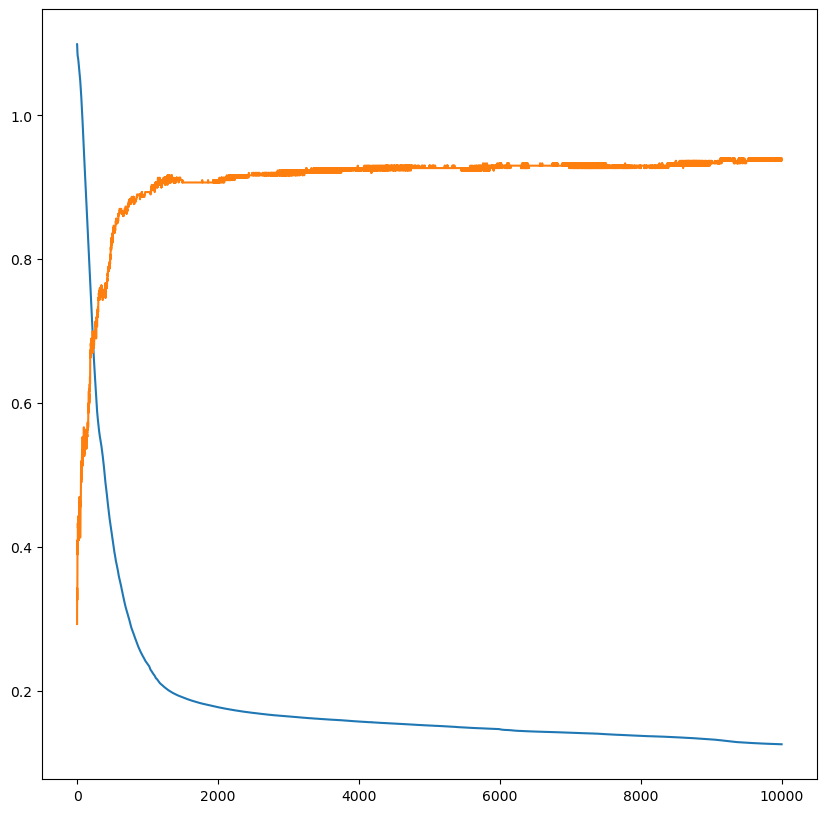

In [17]:
X, y = spiral_data(samples=100, classes=3)
dense1=Layer_Dense(2,64)
act1=Activation_RELU()
dense2=Layer_Dense(64,3)
loss_activation_cross = Activation_Loss_Cross_Entropy()
adam_optimizer = Optimizer_Adam(learning_rate=0.02,decay=1e-5)

all_losses=[]
all_accuracy=[]
epochs=10001

for epoch in range(epochs):
    ##Forward Pass
    dense1.forward(X)
    act1.forward(dense1.output)
    dense2.forward(act1.output)
    loss = loss_activation_cross.forward(dense2.output,y)

    predictions=np.argmax(loss_activation_cross.output,axis=1)
    if len(y.shape) == 2:
        y=np.argmax(y,axis=1) 
    accuracy=np.mean(predictions == y)
    all_accuracy.append(accuracy)
    all_losses.append(loss)
    if epoch % 100 == 0: 
        print(f"Epoch:{epoch}, Accuracy:{accuracy:.3f}, Loss:{loss:.3f}")

    ##Backward Pass
    loss_activation_cross.backward(loss_activation_cross.output,y)
    dense2.backward(loss_activation_cross.dinputs)
    act1.backward(dense2.dinputs)
    dense1.backward(act1.dinputs)

    #Update Params
    adam_optimizer.update_params(dense1)
    adam_optimizer.update_params(dense2)
    adam_optimizer.post_update_params()

##Plot Loss and Accuracy
plt.figure(figsize=(10,10))   
plt.plot(range(epochs),all_losses)
plt.plot(range(epochs),all_accuracy)
plt.show()






## L1 AND L2 Regularization 

In [18]:

class Layer_Dense():
    def __init__(self,n_inputs,n_neurons,w_lambda_l1=0.0,b_lambda_l1=0.0,w_lambda_l2=0.0,b_lambda_l2=0.0):
        ## Randomized Weights and Biases
        self.weights=0.01*np.random.randn(n_inputs,n_neurons)
        self.biases=np.zeros((1,n_neurons))
        self.b_l_l1=b_lambda_l1
        self.b_l_l2 = b_lambda_l2
        self.w_l_l1 = w_lambda_l1
        self.w_l_l2=w_lambda_l2
        
    def forward(self,inputs):
        self.inputs = inputs
        self.output= np.dot(inputs,self.weights) +self.biases
    def backward(self,dvalues):
        self.dweights = np.dot(self.inputs.T,dvalues)
        self.dbiases=np.sum(dvalues,axis=0,keepdims=True)
        ##Gradient For Regularization 
        ###L1 Weight Regularization
        if self.w_l_l1 > 0:
            dl1 =np.ones_like(self.weights)
            dl1[self.weights<0] = -1
            self.dweights += self.w_l_l1 *dl1

         ###L2 Weight Regularization
        if self.w_l_l2 > 0:
            self.dweights += 2*self.w_l_l2 * self.weights

        ###L1 Bias Regularization
        if self.b_l_l1 > 0:
            dl1 =np.ones_like(self.biases)
            dl1[self.biases<0] = -1
            self.dbiases += self.w_l_l1 *dl1

         ###L2 Bias Regularization
        if self.b_l_l2 > 0:
            self.dbiases += 2*self.b_l_l2 * self.biases
            

        self.dinputs=np.dot(dvalues,self.weights.T)




In [19]:
class RegularLoss:

    def regularize_loss(self,layer):
        regularization_loss=0
        ##L1 Weight Regularization
        if layer.w_l_l1 >0:
            regularization_loss += layer.w_l_l1 * np.sum(np.abs(layer.weights))
        ##L2 Weight Regularization
        if layer.w_l_l2 >0:
            regularization_loss += layer.w_l_l2 * np.sum(layer.weights * layer.weights)
        ##L1 Bias Regularization
        if layer.w_l_l1 >0:
            regularization_loss += layer.b_l_l1 * np.sum(np.abs(layer.biases))
        ##L2 Bias Regularization
        if layer.w_l_l2 >0:
            regularization_loss += layer.b_l_l2 * np.sum(layer.biases * layer.biases)

        return regularization_loss
        

    def calculate(self,y_pred,y_true):
        sample_losses=self.forward(y_pred,y_true)
        return np.mean(sample_losses)



In [20]:
class Loss_CategoricalCrossEntropy(RegularLoss):
    def forward(self,y_pred,y_true):
        y_pred_clipped=np.clip(y_pred,1e-7,1-1e-7)
        if len(np.array(y_true).shape) == 1:
            correct_confidences=y_pred_clipped[range(len(y_pred)),y_true]
        elif len(np.array(y_true).shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true,axis=1)
        
        neg_log = -np.log(correct_confidences)
        return neg_log

In [21]:
class Activation_Loss_Cross_Entropy:
    def __init__(self):
        self.activation =Activation_Softmax()
        self.loss=Loss_CategoricalCrossEntropy()
    def forward(self,inputs,y_true):
        self.output=self.activation.forward(inputs)
        return self.loss.calculate(self.output,y_true)
    
    def backward(self,dvalues,y_true):
        samples=len(dvalues)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true,axis=1)
        self.dinputs=dvalues.copy()
        self.dinputs[range(samples),y_true] -= 1
        self.dinputs /= samples
         

Epoch:0, Accuracy:0.333, Loss:1.099, Data Loss:1.099, Regularization Loss:0.000
Epoch:100, Accuracy:0.520, Loss:0.957, Data Loss:0.957, Regularization Loss:0.000
Epoch:200, Accuracy:0.633, Loss:0.806, Data Loss:0.806, Regularization Loss:0.000
Epoch:300, Accuracy:0.683, Loss:0.659, Data Loss:0.658, Regularization Loss:0.000
Epoch:400, Accuracy:0.723, Loss:0.568, Data Loss:0.568, Regularization Loss:0.000
Epoch:500, Accuracy:0.760, Loss:0.517, Data Loss:0.517, Regularization Loss:0.000
Epoch:600, Accuracy:0.763, Loss:0.488, Data Loss:0.488, Regularization Loss:0.000
Epoch:700, Accuracy:0.780, Loss:0.468, Data Loss:0.468, Regularization Loss:0.000
Epoch:800, Accuracy:0.790, Loss:0.453, Data Loss:0.453, Regularization Loss:0.000
Epoch:900, Accuracy:0.787, Loss:0.443, Data Loss:0.442, Regularization Loss:0.001
Epoch:1000, Accuracy:0.773, Loss:0.436, Data Loss:0.435, Regularization Loss:0.001
Epoch:1100, Accuracy:0.777, Loss:0.430, Data Loss:0.429, Regularization Loss:0.001
Epoch:1200, Accu

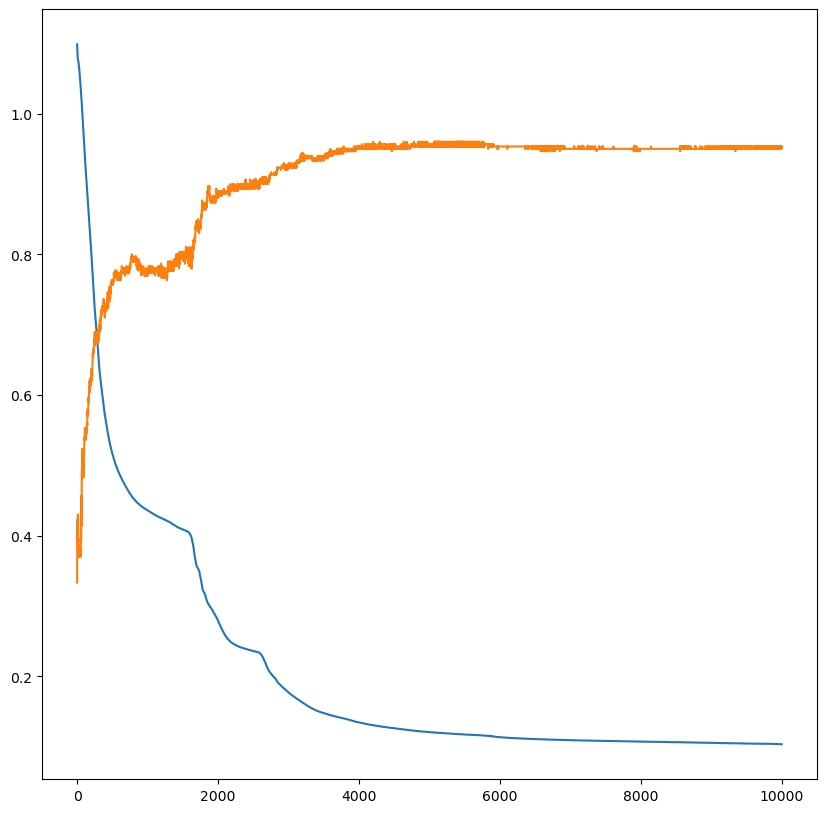

In [22]:
X, y = spiral_data(samples=100, classes=3)
dense1=Layer_Dense(2,64,w_lambda_l2=5e-7,b_lambda_l2=5e-7)
act1=Activation_RELU()
dense2=Layer_Dense(64,3)
loss_activation_cross = Activation_Loss_Cross_Entropy()
adam_optimizer = Optimizer_Adam(learning_rate=0.02,decay=1e-7)

all_losses=[]
all_accuracy=[]
epochs=10001

for epoch in range(epochs):
    ##Forward Pass
    dense1.forward(X)
    act1.forward(dense1.output)
    dense2.forward(act1.output)
    data_loss = loss_activation_cross.forward(dense2.output,y)
    regularization_loss = loss_activation_cross.loss.regularize_loss(dense1)
    regularization_loss += loss_activation_cross.loss.regularize_loss(dense2)

    loss =data_loss + regularization_loss

    predictions=np.argmax(loss_activation_cross.output,axis=1)
    if len(y.shape) == 2:
        y=np.argmax(y,axis=1) 
    accuracy=np.mean(predictions == y)
    all_accuracy.append(accuracy)
    all_losses.append(loss)
    if epoch % 100 == 0: 
        print(f"Epoch:{epoch}, Accuracy:{accuracy:.3f}, Loss:{loss:.3f}, Data Loss:{data_loss:.3f}, Regularization Loss:{regularization_loss:.3f}")

    ##Backward Pass
    loss_activation_cross.backward(loss_activation_cross.output,y)
    dense2.backward(loss_activation_cross.dinputs)
    act1.backward(dense2.dinputs)
    dense1.backward(act1.dinputs)

    #Update Params
    adam_optimizer.update_params(dense1)
    adam_optimizer.update_params(dense2)
    adam_optimizer.post_update_params()

##Plot Loss and Accuracy
plt.figure(figsize=(10,10))   
plt.plot(range(epochs),all_losses)
plt.plot(range(epochs),all_accuracy)
plt.show()






## Test Data After Regularization

In [25]:
X_val, y_val = spiral_data(samples=100, classes=3)
dense1.forward(X)
act1.forward(dense1.output)
dense2.forward(act1.output)
val_loss = loss_activation_cross.forward(dense2.output,y_val)

##Predictions
val_predictions = np.argmax(loss_activation_cross.output,axis = 1)
if len(y_val.shape) == 2:
    y_test=np.argmax(y_val,axis=1) 
val_accuracy = np.mean(val_predictions == y_val)
print(f"Val_Accuracy:{val_accuracy:.3f}, Val_Loss:{val_loss:.3f}")


Val_Accuracy:0.953, Val_Loss:0.100


## Dropout Layer 

In [26]:
class Layer_Dropout:
    def __init__(self,drop_rate):
        self.rate = 1-drop_rate
    def forward(self,inputs):
        self.inputs = inputs
        self.binary_mask =np.random.binomial(1,self.rate,size=inputs.shape) /self.rate
        self.output =inputs * self.binary_mask

    def backward(self,dvalues):
        self.dinputs = dvalues * self.binary_mask



Epoch:0, Accuracy:0.310, Loss:1.099, Data Loss:1.099, Regularization Loss:0.000
Epoch:100, Accuracy:0.397, Loss:1.018, Data Loss:1.018, Regularization Loss:0.000
Epoch:200, Accuracy:0.463, Loss:0.958, Data Loss:0.958, Regularization Loss:0.000
Epoch:300, Accuracy:0.477, Loss:0.919, Data Loss:0.919, Regularization Loss:0.000
Epoch:400, Accuracy:0.483, Loss:0.910, Data Loss:0.910, Regularization Loss:0.000
Epoch:500, Accuracy:0.580, Loss:0.855, Data Loss:0.855, Regularization Loss:0.000
Epoch:600, Accuracy:0.597, Loss:0.867, Data Loss:0.867, Regularization Loss:0.000
Epoch:700, Accuracy:0.613, Loss:0.812, Data Loss:0.812, Regularization Loss:0.000
Epoch:800, Accuracy:0.600, Loss:0.815, Data Loss:0.815, Regularization Loss:0.000
Epoch:900, Accuracy:0.593, Loss:0.802, Data Loss:0.801, Regularization Loss:0.000
Epoch:1000, Accuracy:0.600, Loss:0.828, Data Loss:0.828, Regularization Loss:0.000
Epoch:1100, Accuracy:0.560, Loss:0.823, Data Loss:0.823, Regularization Loss:0.000
Epoch:1200, Accu

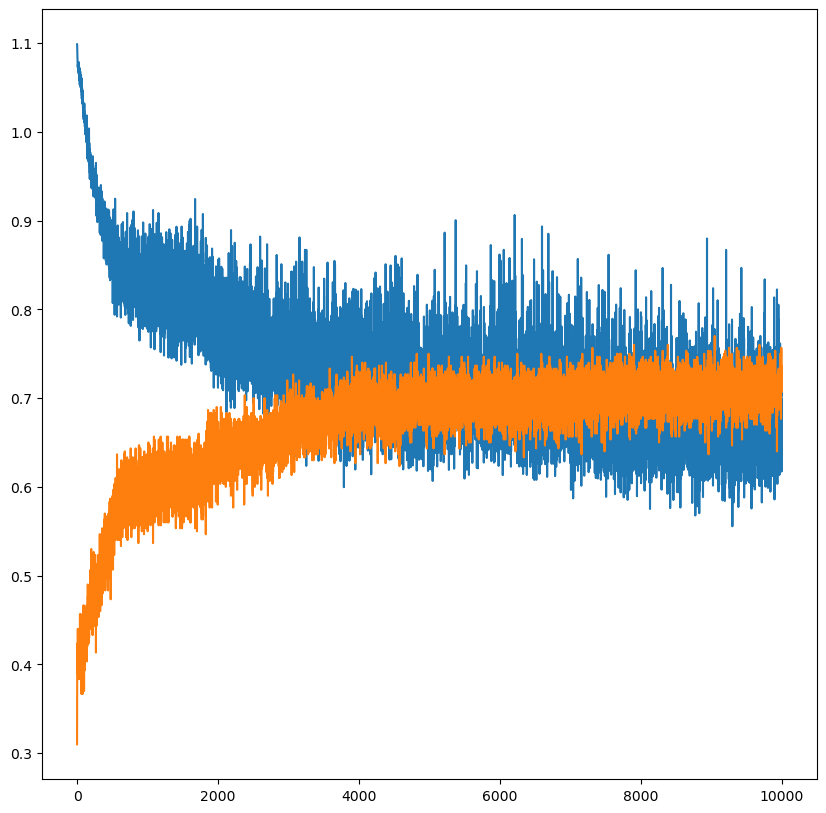

In [27]:
X, y = spiral_data(samples=100, classes=3)
dense1=Layer_Dense(2,64,w_lambda_l2=5e-7,b_lambda_l2=5e-7)
act1=Activation_RELU()
dense2=Layer_Dense(64,3)
dropout1 = Layer_Dropout(0.1)
loss_activation_cross = Activation_Loss_Cross_Entropy()
adam_optimizer = Optimizer_Adam(learning_rate=0.02,decay=1e-7)

all_losses=[]
all_accuracy=[]
epochs=10001

for epoch in range(epochs):
    ##Forward Pass
    dense1.forward(X)
    act1.forward(dense1.output)
    dropout1.forward(act1.output)
    dense2.forward(dropout1.output)
    data_loss = loss_activation_cross.forward(dense2.output,y)
    regularization_loss = loss_activation_cross.loss.regularize_loss(dense1)
    regularization_loss += loss_activation_cross.loss.regularize_loss(dense2)

    loss =data_loss + regularization_loss

    predictions=np.argmax(loss_activation_cross.output,axis=1)
    if len(y.shape) == 2:
        y=np.argmax(y,axis=1) 
    accuracy=np.mean(predictions == y)
    all_accuracy.append(accuracy)
    all_losses.append(loss)
    if epoch % 100 == 0: 
        print(f"Epoch:{epoch}, Accuracy:{accuracy:.3f}, Loss:{loss:.3f}, Data Loss:{data_loss:.3f}, Regularization Loss:{regularization_loss:.3f}")

    ##Backward Pass
    loss_activation_cross.backward(loss_activation_cross.output,y)
    dense2.backward(loss_activation_cross.dinputs)
    dropout1.backward(dense2.dinputs)
    act1.backward(dropout1.dinputs)
    dense1.backward(act1.dinputs)

    #Update Params
    adam_optimizer.update_params(dense1)
    adam_optimizer.update_params(dense2)
    adam_optimizer.post_update_params()

##Plot Loss and Accuracy
plt.figure(figsize=(10,10))   
plt.plot(range(epochs),all_losses)
plt.plot(range(epochs),all_accuracy)
plt.show()






In [28]:
X_val, y_val = spiral_data(samples=100, classes=3)
dense1.forward(X)
act1.forward(dense1.output)
dropout1.forward(act1.output)
dense2.forward(act1.output)
val_loss = loss_activation_cross.forward(dense2.output,y_val)

##Predictions
val_predictions = np.argmax(loss_activation_cross.output,axis = 1)
if len(y_val.shape) == 2:
    y_test=np.argmax(y_val,axis=1) 
val_accuracy = np.mean(val_predictions == y_val)
print(f"Val_Accuracy:{val_accuracy:.3f}, Val_Loss:{val_loss:.3f}")


Val_Accuracy:0.777, Val_Loss:0.540
